<div style='background-color: #ffc154;
    border: 0.5em solid black;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Devoir maison</h2>
    <h1>Traitement d'une image</h1>
</div>

L'objectif de ce devoir est de travailler sur une image grâce au module `PIL`, qui peut être installé en exécutant la cellule suivante.

In [ ]:
import sys
!{sys.executable} -m pip install Pillow

On peut importer la classe `Image` du module `PIL` en exécutant la cellule suivante.

In [1]:
from PIL import Image

### Chargement et enregistrement d'une image

**(1)** Après avoir testé la fonction `charger_image` et la procédure `enregistrer_image`, écrire leur spécification.

In [2]:
import requests

def charger_image(url):
    """
    Ouvre une image avec le module PIL.
    - Entrée : url (chaîne, url d'un fichier image)
    - Sortie : img (instance de la classe Image)
    """
    image = Image.open(requests.get(url, stream=True).raw)
    image = image.convert(mode='RGB')
    return image

def enregistrer_image(image, nom_fichier):
    """
    Enregistre une image dans un fichier.
    - Entrées : image (instance de la classe Image),
                nom_fichier (chaîne, nom d'un fichier image)
    Effet de bord : écriture dans un fichier
    """
    image.save(nom_fichier)

In [3]:
homer = charger_image('https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/homer.png')

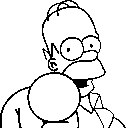

In [4]:
homer # Affichage de l'image

In [5]:
enregistrer_image(homer, 'homer.png')

### Détermination et modification de la couleur d'un pixel

On donne la fonction `couleur_est_exactement` définie dans la cellule suivante.

In [6]:
def couleur_est_exactement(image, x, y, coul):
    """
    Détermine si un pixel d'une image est d'une couleur donnée.
    - Entrées : image (instance de la classe Image),
                x, y (entiers),
                coul (p-uplet d'entiers au format (R, V, B))
    - Sortie : (booléen)
    """
    return image.getpixel((x, y)) == coul

**(2)** Déterminer à quel p-uplet d'entiers est associée chacune des couleurs ci-dessous.

In [7]:
BLANC = (255, 255, 255)
NOIR = (0, 0, 0)
ROUGE = (255, 0, 0)
JAUNE = (255, 217, 15) # couleur des personnages de la série Les Simpsons

**(3)** Écrire des lignes de code qui permettent de compter le nombre de pixels blancs contenus dans l'image `homer`.

_Remarque :_ Les dimensions d'une image sont accessibles via `image.width` pour sa largeur et `image.height` pour sa hauteur.

In [8]:
cpt = 0
for x in range(homer.width):
    for y in range(homer.height):
        if couleur_est_exactement(homer, x, y, BLANC):
            cpt = cpt + 1
print(cpt)

14847


**(4)** Après avoir testé la fonction `colorer_pixel`, écrire sa spécification.

In [9]:
def colorer_pixel(image, x, y, coul):
    """
    Colore un pixel d'une image dans une couleur donnée.
    - Entrées : image (instance de la classe Image),
                x, y (entiers),
                coul (p-uplet d'entiers au format (R, V, B))
    - Sortie : image (instance de la classe Image)
    """
    image.putpixel((x, y), coul)
    return image

In [10]:
ROUGE = (255, 0, 0)
for x in range(30):
    for y in range(20):
        homer = colorer_pixel(homer, x, y, ROUGE)

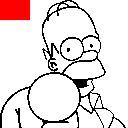

In [11]:
homer # Affichage de l'image

### Coloriage récursif d'une zone

On souhaite maintenant pouvoir colorer une zone de l'image délimitée par des pixels noirs, par exemple le bout du doigt d'Homer.

**(5)** Quel est le rôle des deux lignes de code ci-dessous ?

In [12]:
from sys import setrecursionlimit
setrecursionlimit(20000)

_Ces deux lignes permettent de fixer à 20000 la limite du nombre d'appels récursifs autorisés._

**(6)** Compléter la définition de la fonction récursive `remplir`.

In [13]:
def remplir(image, x, y, coul):
    """
    Colore la zone de l'image composée de pixels blancs et contenant le pixel de coordonnées (x, y).
    - Entrées : image (instance de la classe Image),
                x, y (entiers),
                coul (p-uplet d'entiers au format (R, V, B))
    - Sortie : image (instance de la classe Image)
    """
    if couleur_est_exactement(image, x, y, BLANC):
        image = colorer_pixel(image, x, y, coul)
        if x > 0:
            image = remplir(image, x-1, y, coul)
        if x < image.width - 1:
            image = remplir(image, x+1, y, coul)
        if y > 0:
            image = remplir(image, x, y-1, coul)
        if y < image.height - 1:
            image = remplir(image, x, y+1, coul)
    return image

Les deux cellules suivantes permet de tester la fonction `remplir`.

In [14]:
homer = charger_image('https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/homer.png')
homer = remplir(homer, 50, 100, JAUNE)

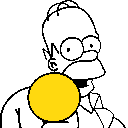

In [15]:
homer # Affichage de l'image

<div style='background-color: #ffc154;
    border-radius: 0.5em;
    padding: 1em;'>
    <h2>Pour aller plus loin...</h2>
</div>

On souhaite désormais pouvoir redimensionner une image prise sur internet ainsi que pouvoir la transformer en image noir et blanc.

### Redimensionnement

**(7)** Après avoir consulté la [documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html) du module `PIL.Image`, définir une fonction `redimensionner` qui prend en paramètres d'entrée une `image` et un flottant strictement positif `coeff` et qui renvoie la `nouvelle_image` obtenue en multipliant par `coeff` la largeur et la hauteur de l'`image` initiale.

Par exemple, `redimensionner(image, 0.5)` doit renvoyer l'image obtenue en divisant par 2 les dimensions de `image`.

In [16]:
def redimensionner(image, coeff):
    """
    Applique à une image un coefficient de redimensionnement.
    - Entrées : image (instance de la classe Image),
                coefficient (flottant strictement positif)
    - Sortie : nouvelle_image (instance de la classe Image)
    """
    nouvelle_largeur = int(image.width * coeff)
    nouvelle_hauteur = int(image.height * coeff)
    nouvelle_image = image.resize((nouvelle_largeur, nouvelle_hauteur))
    return nouvelle_image

In [17]:
lisa = charger_image('https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisa.png')

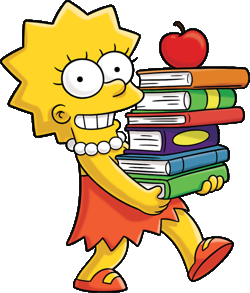

In [18]:
lisa # Affichage de l'image

In [19]:
lisa = redimensionner(lisa, 0.5)

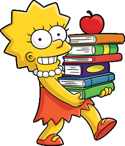

In [20]:
lisa # Affichage de l'image

### Passage d'une image en noir et blanc

**(8)** Écrire la spécification de la fonction `couleur_est_presque`.

In [21]:
def distance(coul1, coul2):
    """
    Détermine la "distance" entre deux couleurs.
    - Entrées : coul1, coul2 (p-uplets d'entiers au format (R, V, B))
    - Sortie : dist (flottant)
    """
    r = (coul1[0] + coul2[0]) / 2
    delta_R = coul1[0] - coul2[0]
    delta_G = coul1[1] - coul2[1]
    delta_B = coul1[2] - coul2[2]
    dist = ((2 + r/256)*(delta_R)**2 + 4*(delta_G)**2 + (2 + (255 - r)/256)*(delta_B)**2)**0.5
    return dist

def couleur_est_presque(image, x, y, coul):
    """
    Détermine si un pixel d'une image est "presque" d'une couleur donnée.
    - Entrées : image (instance de la classe Image),
                x, y (entiers),
                coul (p-uplet d'entiers au format (R, V, B))
    - Sortie : (booléen)
    """
    return distance(image.getpixel((x, y)), coul) < 300

**(9)** Définir la fonction `noir_et_blanc` conformément à sa spécification.

In [22]:
def noir_et_blanc(image):
    """
    Transforme une image en image en noir et blanc : les pixels "presque" noirs sont transformés
    en pixels noirs, les autres sont transformés en pixels blancs.
    - Entrées : nouvelle_image (instance de la classe Image)
    - Sortie : nouvelle_image (instance de la classe Image)
    """
    largeur, hauteur = image.size
    for x in range(largeur):
        for y in range(hauteur):
            if couleur_est_presque(image, x, y, NOIR):
                image = colorer_pixel(image, x, y, NOIR)
            else:
                image = colorer_pixel(image, x, y, BLANC)
    return image

In [23]:
lisa = charger_image('https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisa.png')
lisa = noir_et_blanc(lisa)

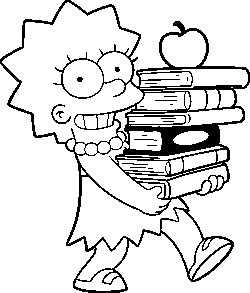

In [24]:
lisa # Affichage de l'image

### Définition d'une classe

**(10)** Définir une classe `MonImage` dont les instances possèdent :
- les attributs :
    - `im` (instance de la classe Image importée du module PIL),
    - `larg`, `haut` (entiers, largeur et hauteur de l'image en pixels),
- les méthodes :
    - `__init__` (ouvre une image depuis une url et initialise les attributs `larg` et `haut`),
    - `enregistrer` (enregistre l'image dans un fichier dont le nom est passé en argument),
    - `remplir` (colore la zone de l'image composée de pixels blancs et contenant le pixel de coordonnées (x, y)),
    - `redimensionner` (modifie les dimensions de l'image en leur appliquant un coefficient passé en argument),
    - `noir et blanc` (transforme l'image en une image en noir et blanc).

In [25]:
from PIL import Image
import requests
from sys import setrecursionlimit

NOIR = (0, 0, 0)
BLANC = (255, 255, 255)

def distance(coul1, coul2):
    r = (coul1[0] + coul2[0]) / 2
    delta_R = coul1[0] - coul2[0]
    delta_G = coul1[1] - coul2[1]
    delta_B = coul1[2] - coul2[2]
    dist = ((2 + r/256)*(delta_R)**2 + 4*(delta_G)**2 + (2 + (255 - r)/256)*(delta_B)**2)**0.5
    return dist

class MonImage:
    def __init__(self, url):
        self.im = Image.open(requests.get(url, stream=True).raw)
        self.im = self.im.convert(mode='RGB')
        self.larg = self.im.width
        self.haut = self.im.height
        setrecursionlimit(self.larg * self.haut)
    
    def enregistrer(self, nom_fichier):
        self.im.save(nom_fichier)

    def _colorer(self, x, y, coul):
        self.im.putpixel((x, y), coul)
        
    def remplir(self, x, y, coul):
        if self.im.getpixel((x, y)) == BLANC:
            self._colorer(x, y, coul)
            if x > 0:
                self.remplir(x-1, y, coul)
            if x < self.larg - 1:
                self.remplir(x+1, y, coul)
            if y > 0:
                self.remplir(x, y-1, coul)
            if y < self.haut - 1:
                self.remplir(x, y+1, coul)
    
    def redimensionner(self, coeff):
        self.larg = int(self.larg * coeff)
        self.haut = int(self.haut * coeff)
        self.im = self.im.resize((self.larg, self.haut))
        
    def noir_et_blanc(self):
        for x in range(self.larg):
            for y in range(self.haut):
                if distance(self.im.getpixel((x, y)), NOIR) < 300:
                    self._colorer(x, y, NOIR)
                else:
                    self._colorer(x, y, BLANC)

**(11)** Écrire des lignes de code permettant de :
- charger l'image à l'adresse `https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisa.png`,
- réduire de 20% les dimensions de l'image,
- transformer l'image ainsi réduite en image en noir et blanc,
- colorer en rouge la zone de pixels blancs autour du pixel de coordonnées `(150, 40)`,
- enregistrer enfin l'image obtenue dans un fichier `lisapple.png`.

In [26]:
image = MonImage('https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisa.png')
image.redimensionner(0.8)
image.noir_et_blanc()
image.remplir(150, 40, (255, 0, 0))
image.enregistrer('lisapple.png')

<div style='float: left; width: 50%'><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisa.png'></div>
<div style='float: left; width: 50%'><img src='https://ntoulzac.github.io/Cours-NSI-Terminale/devoirs/images/lisapple.png'></div>